### Exploratory Data Analysis(EDA): MTA Mask Force Placement

Python libraries used: Pandas, Numpy, Matplot, libSeaborn

Dataset used: MTA Turnstile Data (Source: http://web.mta.info/developers/turnstile.html), NYC borough maps, and MTA Station Location Data 

About the data set:
C/A
UNIT
SCP
LINENAME
DIVISION
DATE
TIME
DESC
ENTRIES 
EXITS

### Data Description

### Data Loads

In [2]:
# importing database
from sqlalchemy import create_engine
from sqlalchemy import inspect 

# data manipulation and analysis
import pandas as pd
import numpy as np
import datetime as dt
from datetime import timedelta

# data visualization
import seaborn as sns
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [9]:
engine = create_engine('sqlite:///mta_data.db') # querying the MTA data
inspec = inspect(engine)
inspec.get_table_names()

['mta_data']

In [56]:
mta_data = pd.read_sql('SELECT * FROM mta_data WHERE date LIKE \'%21\';', engine)

In [4]:
mta_data.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/07/2021,00:00:00,REGULAR,7614946,2604740
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/07/2021,04:00:00,REGULAR,7614956,2604740
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/07/2021,08:00:00,REGULAR,7614964,2604758
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/07/2021,12:00:00,REGULAR,7615017,2604803
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/07/2021,16:00:00,REGULAR,7615136,2604830


In [5]:
mta_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4186968 entries, 0 to 4186967
Data columns (total 11 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   C/A       object
 1   UNIT      object
 2   SCP       object
 3   STATION   object
 4   LINENAME  object
 5   DIVISION  object
 6   DATE      object
 7   TIME      object
 8   DESC      object
 9   ENTRIES   int64 
 10  EXITS     int64 
dtypes: int64(2), object(9)
memory usage: 351.4+ MB


In [6]:
mta_data.isna().sum() #checking if any null values

C/A         0
UNIT        0
SCP         0
STATION     0
LINENAME    0
DIVISION    0
DATE        0
TIME        0
DESC        0
ENTRIES     0
EXITS       0
dtype: int64

In [7]:
# change column names to lower case
mta_data.columns = mta_data.columns.str.lower()
mta_data.columns

Index(['c/a', 'unit', 'scp', 'station', 'linename', 'division', 'date', 'time',
       'desc', 'entries', 'exits'],
      dtype='object')

In [8]:
# let's change the datatype for date and time to datetime and combine those together in a new column

mta_data['date_time'] = pd.to_datetime(mta_data['date'] + ' ' + mta_data['time'])
print('The MTA data is from:', mta_data['date_time'].min(), 'to', mta_data['date_time'].max())


The MTA data is from: 2021-03-27 00:00:00 to 2021-08-13 23:57:50


## Exploring Data

## DATA CLEARNING 

Any duplicate check

In [9]:
mask = ((mta_data["c/a"] == "A002") &
        (mta_data["unit"] == "R051") & 
        (mta_data["scp"] == "02-00-00") & 
        (mta_data["station"] == "59 ST"))

mta_data[mask].head()

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits,date_time
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/07/2021,00:00:00,REGULAR,7614946,2604740,2021-08-07 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/07/2021,04:00:00,REGULAR,7614956,2604740,2021-08-07 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/07/2021,08:00:00,REGULAR,7614964,2604758,2021-08-07 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/07/2021,12:00:00,REGULAR,7615017,2604803,2021-08-07 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/07/2021,16:00:00,REGULAR,7615136,2604830,2021-08-07 16:00:00


In [10]:
mask = ((mta_data["c/a"] == "R626") & 
(mta_data["unit"] == "R062") & 
(mta_data["scp"] == "00-00-00") & 
(mta_data["station"] == "CROWN HTS-UTICA"))

mta_data[mask].head()

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits,date_time
202437,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,08/07/2021,00:00:00,REGULAR,16017351,3541719,2021-08-07 00:00:00
202438,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,08/07/2021,04:00:00,REGULAR,16017365,3541736,2021-08-07 04:00:00
202439,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,08/07/2021,08:00:00,REGULAR,16017522,3541762,2021-08-07 08:00:00
202440,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,08/07/2021,12:00:00,REGULAR,16017722,3541814,2021-08-07 12:00:00
202441,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,08/07/2021,16:00:00,REGULAR,16017983,3541901,2021-08-07 16:00:00


In [11]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique

(mta_data
 .groupby(["c/a", "unit", "scp", "station", "date_time"])
 .entries.count()
 .reset_index()
 .sort_values("entries", ascending=False)).head(5)

,c/a,unit,scp,station,date_time,entries
356464,B024,R211,00-05-00,KINGS HWY,2021-05-02 04:00:00,2
1136483,N071,R013,00-00-02,34 ST-PENN STA,2021-04-08 08:00:00,2
356474,B024,R211,00-05-00,KINGS HWY,2021-05-03 20:00:00,2
356473,B024,R211,00-05-00,KINGS HWY,2021-05-03 16:00:00,2
356472,B024,R211,00-05-00,KINGS HWY,2021-05-03 12:00:00,2


In [12]:
# There are two entries for same time. Let's take a look for some dates, e.g., 07/22/2021

mask = ((mta_data["c/a"] == "R514") & 
(mta_data["unit"] == "R094") & 
(mta_data["scp"] == "00-05-00") & 
(mta_data["station"] == "ASTORIA BLVD") &
(mta_data["date_time"].dt.date == dt.datetime(2021, 7, 22).date()))

mta_data[mask].head(10)

,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits,date_time
816588,R514,R094,00-05-00,ASTORIA BLVD,NQW,BMT,07/22/2021,00:00:00,REGULAR,3,0,2021-07-22 00:00:00
816589,R514,R094,00-05-00,ASTORIA BLVD,NQW,BMT,07/22/2021,00:00:00,RECOVR AUD,262243,0,2021-07-22 00:00:00
816590,R514,R094,00-05-00,ASTORIA BLVD,NQW,BMT,07/22/2021,04:00:00,REGULAR,3,0,2021-07-22 04:00:00
816591,R514,R094,00-05-00,ASTORIA BLVD,NQW,BMT,07/22/2021,04:00:00,RECOVR AUD,262243,0,2021-07-22 04:00:00
816592,R514,R094,00-05-00,ASTORIA BLVD,NQW,BMT,07/22/2021,07:39:19,REGULAR,3,0,2021-07-22 07:39:19
816593,R514,R094,00-05-00,ASTORIA BLVD,NQW,BMT,07/22/2021,07:40:57,REGULAR,3,0,2021-07-22 07:40:57
816594,R514,R094,00-05-00,ASTORIA BLVD,NQW,BMT,07/22/2021,08:00:00,REGULAR,3,0,2021-07-22 08:00:00
816595,R514,R094,00-05-00,ASTORIA BLVD,NQW,BMT,07/22/2021,08:00:00,RECOVR AUD,262243,0,2021-07-22 08:00:00
816596,R514,R094,00-05-00,ASTORIA BLVD,NQW,BMT,07/22/2021,12:00:00,REGULAR,3,0,2021-07-22 12:00:00
816597,R514,R094,00-05-00,ASTORIA BLVD,NQW,BMT,07/22/2021,12:00:00,RECOVR AUD,262243,0,2021-07-22 12:00:00


Incorrect DESC values are observed, i.e., RECOVER AUD. We will drop those duplicating entries. 

In [13]:
mta_data.desc.value_counts()

REGULAR       4170474
RECOVR AUD      16494
Name: desc, dtype: int64

In [14]:
# Get rid of the duplicate entry
mta_data.sort_values(["c/a", "unit", "scp", "station", "date_time"], 
                          inplace=True, ascending=False)
mta_data.drop_duplicates(subset=["c/a", "unit", "scp", "station", "date_time"], inplace=True)

In [15]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(mta_data
 .groupby(["c/a", "unit", "scp", "station", "date_time"])
 .entries.count()
 .reset_index()
 .sort_values("entries", ascending=False)).head(5)

,c/a,unit,scp,station,date_time,entries
0,A002,R051,02-00-00,59 ST,2021-03-27 00:00:00,1
2791278,R138,R293,00-03-04,34 ST-PENN STA,2021-06-18 14:00:00,1
2791265,R138,R293,00-03-04,34 ST-PENN STA,2021-06-16 10:00:00,1
2791266,R138,R293,00-03-04,34 ST-PENN STA,2021-06-16 14:00:00,1
2791267,R138,R293,00-03-04,34 ST-PENN STA,2021-06-16 18:00:00,1


In [16]:
# We will only look at "entries" because the Mask Force will look for riders who are entering subway stations Drop Exits and Desc Column.  
# To prevent errors in multiple run of cell, errors on drop is ignored.

mta_data = mta_data.drop(["exits", "desc"], axis=1, errors="ignore")

Let's take a look at a spepcific turnstiles on a specific date and figure out what  `entries` column looks like. 

In [17]:
mta_data[(mta_data["c/a"] == "R138") & 
(mta_data["unit"] == "R293") & 
(mta_data["scp"] == "00-03-03") & 
(mta_data["station"] == "34 ST-PENN STA") &
(mta_data["date"] == "06/18/2021")].sort_values(by = 'time')

,c/a,unit,scp,station,linename,division,date,time,entries,date_time
1815390,R138,R293,00-03-03,34 ST-PENN STA,123ACE,IRT,06/18/2021,02:00:00,28736,2021-06-18 02:00:00
1815391,R138,R293,00-03-03,34 ST-PENN STA,123ACE,IRT,06/18/2021,06:00:00,28747,2021-06-18 06:00:00
1815392,R138,R293,00-03-03,34 ST-PENN STA,123ACE,IRT,06/18/2021,10:00:00,28840,2021-06-18 10:00:00
1815393,R138,R293,00-03-03,34 ST-PENN STA,123ACE,IRT,06/18/2021,14:00:00,28932,2021-06-18 14:00:00
1815394,R138,R293,00-03-03,34 ST-PENN STA,123ACE,IRT,06/18/2021,18:00:00,29032,2021-06-18 18:00:00
1815395,R138,R293,00-03-03,34 ST-PENN STA,123ACE,IRT,06/18/2021,22:00:00,29115,2021-06-18 22:00:00


The `ENTRIES` column represents cumulative entries at every four hours. We will calculate `DAILY ENTRIES` by substracting from previous entries. 

In [18]:
turnstiles_daily = (mta_data
                        .groupby(["c/a", "unit", "scp", "station", "date"],as_index=False)
                        [['entries','time','date_time']].first())

In [19]:
turnstiles_daily.head()

,c/a,unit,scp,station,date,entries,time,date_time
0,A002,R051,02-00-00,59 ST,03/27/2021,7550517,20:00:00,2021-03-27 20:00:00
1,A002,R051,02-00-00,59 ST,03/28/2021,7550675,20:00:00,2021-03-28 20:00:00
2,A002,R051,02-00-00,59 ST,03/29/2021,7551178,20:00:00,2021-03-29 20:00:00
3,A002,R051,02-00-00,59 ST,03/30/2021,7551731,20:00:00,2021-03-30 20:00:00
4,A002,R051,02-00-00,59 ST,03/31/2021,7552051,20:00:00,2021-03-31 20:00:00


In [20]:
turnstiles_daily[["previous_date", "previous_entries"]] = (turnstiles_daily
                                                       .groupby(["c/a", "unit", "scp", "station"])["date", "entries"]
                                                       .apply(lambda grp: grp.shift(1)))

<ipython-input-20-5ad26fdf8781>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  turnstiles_daily[["previous_date", "previous_entries"]] = (turnstiles_daily


In [21]:
turnstiles_daily.head()

,c/a,unit,scp,station,date,entries,time,date_time,previous_date,previous_entries
0,A002,R051,02-00-00,59 ST,03/27/2021,7550517,20:00:00,2021-03-27 20:00:00,NaN,NaN
1,A002,R051,02-00-00,59 ST,03/28/2021,7550675,20:00:00,2021-03-28 20:00:00,03/27/2021,7550517.0
2,A002,R051,02-00-00,59 ST,03/29/2021,7551178,20:00:00,2021-03-29 20:00:00,03/28/2021,7550675.0
3,A002,R051,02-00-00,59 ST,03/30/2021,7551731,20:00:00,2021-03-30 20:00:00,03/29/2021,7551178.0
4,A002,R051,02-00-00,59 ST,03/31/2021,7552051,20:00:00,2021-03-31 20:00:00,03/30/2021,7551731.0


In [22]:
turnstiles_daily.tail()

,c/a,unit,scp,station,date,entries,time,date_time,previous_date,previous_entries
699127,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/09/2021,5554,21:00:00,2021-08-09 21:00:00,08/08/2021,5554.0
699128,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/10/2021,5554,21:00:00,2021-08-10 21:00:00,08/09/2021,5554.0
699129,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/11/2021,5554,21:00:00,2021-08-11 21:00:00,08/10/2021,5554.0
699130,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/12/2021,5554,21:00:00,2021-08-12 21:00:00,08/11/2021,5554.0
699131,TRAM2,R469,00-05-01,RIT-ROOSEVELT,08/13/2021,5554,21:00:00,2021-08-13 21:00:00,08/12/2021,5554.0


In [23]:
# Drop the rows for the earliest date in the df
turnstiles_daily.dropna(subset=["previous_date"], axis=0, inplace=True)

Before we substact `PREV_ENTRIES` from `ENTRIES`, we will see if every `ENTRIES` data are greater than `PREV_ENTRIES`.

In [24]:
turnstiles_daily[turnstiles_daily["entries"] < turnstiles_daily["previous_entries"]].head()

,c/a,unit,scp,station,date,entries,time,date_time,previous_date,previous_entries
5461,A011,R080,01-03-00,57 ST-7 AV,03/28/2021,885615115,20:00:00,2021-03-28 20:00:00,03/27/2021,885615225.0
5462,A011,R080,01-03-00,57 ST-7 AV,03/29/2021,885614981,20:00:00,2021-03-29 20:00:00,03/28/2021,885615115.0
5463,A011,R080,01-03-00,57 ST-7 AV,03/30/2021,885614771,20:00:00,2021-03-30 20:00:00,03/29/2021,885614981.0
5464,A011,R080,01-03-00,57 ST-7 AV,03/31/2021,885614541,20:00:00,2021-03-31 20:00:00,03/30/2021,885614771.0
5465,A011,R080,01-03-00,57 ST-7 AV,04/01/2021,885614329,20:00:00,2021-04-01 20:00:00,03/31/2021,885614541.0


In [25]:
# What's the deal with counter being in reverse
mask = ((mta_data["c/a"] == "A011") & 
(mta_data["unit"] == "R080") & 
(mta_data["scp"] == "01-03-00") & 
(mta_data["station"] == "57 ST-7 AV") &
(mta_data["date_time"].dt.date == dt.datetime(2021, 5, 15).date()))
mta_data[mask].head()

,c/a,unit,scp,station,linename,division,date,time,entries,date_time
2514682,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,05/15/2021,20:00:00,885604837,2021-05-15 20:00:00
2514681,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,05/15/2021,16:00:00,885604902,2021-05-15 16:00:00
2514680,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,05/15/2021,12:00:00,885604936,2021-05-15 12:00:00
2514679,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,05/15/2021,08:00:00,885604960,2021-05-15 08:00:00
2514678,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,05/15/2021,04:00:00,885604965,2021-05-15 04:00:00


found that counter working in reverse 

In [26]:
def get_daily_counts(row, max_counter):
    counter = row["entries"] - row["previous_entries"]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        print(row["entries"], row["previous_entries"])
        counter = min(row["entries"], row["previous_entries"])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
# It'd probably be a good idea to use a number even significantly smaller than 1 million as the limit!
turnstiles_daily["daily_entries"] = turnstiles_daily.apply(get_daily_counts, axis=1, max_counter=15000)

59 154688.0
3082 1390173.0
29 479839.0
427 67581.0
18 4340953.0
738 18398229.0
262161 337910.0
262144 1.0
187 30721.0
14 1028362.0
93 765803.0
5 150038.0
29 247929.0
26 56083.0
25 1400020.0
327680 756269765.0
385 327866.0
262152 553649999.0
25 262152.0
262152 229572623.0
353 8049630.0
0 5309746.0
262145 568.0
524289 132.0
458752 24.0
262144 0.0
262304 32165.0
262309 279345.0
589827 953.0
101 2651127.0
393219 459438.0
104 17275602.0
166 20146.0
91 863563.0
243 366175.0
5 262157.0
262149 9.0
458754 262214.0
8 458758.0
393225 7714275.0
457 59478.0
2147432315 8421808.0
65 106396.0
236 648918.0
262144 33554713.0
458754 262144.0
393216 458752.0
110 629380.0
1946307751 1946273868.0
42 72848.0
901 659349.0
0 26347.0
0 28318.0
33 839517.0
327680 4.0
1 327690.0
24 2627860.0
327680 262144.0
166 89658.0
241 59609.0
493 392076.0
232 4735529.0
87 20329.0
153 1604971.0
5946 4298704.0
0 117440512.0
1692712 1660527.0
5258843 5239798.0
1017622 993213.0
1099619 1069183.0
741904 716139.0
9279918 9252695.0

In [27]:
turnstiles_daily.head()

,c/a,unit,scp,station,date,entries,time,date_time,previous_date,previous_entries,daily_entries
1,A002,R051,02-00-00,59 ST,03/28/2021,7550675,20:00:00,2021-03-28 20:00:00,03/27/2021,7550517.0,158.0
2,A002,R051,02-00-00,59 ST,03/29/2021,7551178,20:00:00,2021-03-29 20:00:00,03/28/2021,7550675.0,503.0
3,A002,R051,02-00-00,59 ST,03/30/2021,7551731,20:00:00,2021-03-30 20:00:00,03/29/2021,7551178.0,553.0
4,A002,R051,02-00-00,59 ST,03/31/2021,7552051,20:00:00,2021-03-31 20:00:00,03/30/2021,7551731.0,320.0
5,A002,R051,02-00-00,59 ST,04/01/2021,7552051,20:00:00,2021-04-01 20:00:00,03/31/2021,7552051.0,0.0


In [28]:
turnstiles_daily.describe()

,entries,previous_entries,daily_entries
count,6.940910e+05,6.940910e+05,694091.000000
mean,4.164603e+07,4.164968e+07,347.879062
std,2.181499e+08,2.181504e+08,358.957144
min,0.000000e+00,0.000000e+00,0.000000
25%,2.141180e+05,2.140815e+05,81.000000
50%,1.409278e+06,1.409593e+06,254.000000
75%,6.021279e+06,6.022154e+06,505.000000
max,2.147432e+09,2.147432e+09,14361.000000


## Data Exploration

This portion is to answer how the volume of entries differ by time (morning vs. afternoon vs. evening)?

In [29]:
morning = turnstiles_daily[(turnstiles_daily['date_time'].dt.time >= dt.time(6, 0, 0)) &
(turnstiles_daily['date_time'].dt.time < dt.time(12, 0, 0))][['date_time','daily_entries']]
morning.sort_values(by = 'date_time', ascending = True)

,date_time,daily_entries
327466,2021-03-28 08:00:00,0.0
653668,2021-03-28 08:00:00,1.0
472123,2021-03-29 08:00:00,111.0
653808,2021-03-30 08:00:00,0.0
95670,2021-03-31 09:00:00,0.0
...,...,...
404492,2021-08-12 11:25:28,151.0
98323,2021-08-13 08:00:00,37.0
590724,2021-08-13 09:00:00,0.0
590586,2021-08-13 09:00:00,0.0


In [30]:
morning = turnstiles_daily[(turnstiles_daily['date_time'].dt.time >= dt.time(6, 0, 0)) &
(turnstiles_daily['date_time'].dt.time < dt.time(12, 0, 0))].groupby('station')[['daily_entries']].sum()\
.sort_values('daily_entries', ascending = False).reset_index()


In [31]:
afternoon =turnstiles_daily[(turnstiles_daily['date_time'].dt.time >= dt.time(12, 0, 0)) &
(turnstiles_daily['date_time'].dt.time < dt.time(18, 0, 0))].groupby('station')[['daily_entries']].sum()\
.sort_values('daily_entries', ascending = False).reset_index()

evening = turnstiles_daily[(turnstiles_daily['date_time'].dt.time >= dt.time(18, 0, 0)) &
(turnstiles_daily['date_time'].dt.time < dt.time(23, 59, 59))].groupby('station')[['daily_entries']].sum()\
.sort_values('daily_entries', ascending = False).reset_index()



Text(0.5, 1.0, 'Morning Traffic (6am to 12pm)')

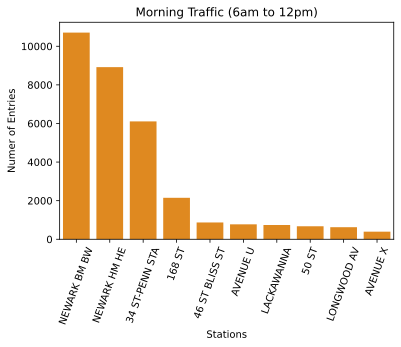

In [32]:
horly_stations = sns.barplot(x = morning['station'][:10], 
            y = morning['daily_entries'][:10], 
            data = morning,
            color = 'darkorange'
           )

plt.xticks(rotation = 70)
plt.ylabel('Numer of Entries')
plt.xlabel('Stations')
plt.title('Morning Traffic (6am to 12pm)')


Text(0.5, 1.0, 'Morning Traffic (6am to 12pm)')

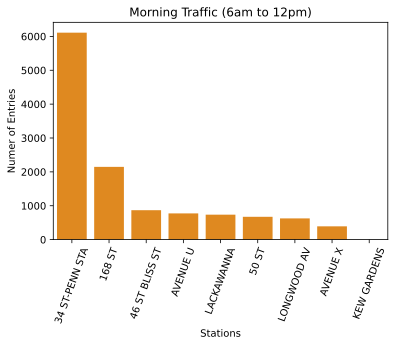

In [52]:
# since NJ Newark PATH is not in our scope in NYC, I see next top 10 stations.

horly_stations = sns.barplot(x = morning['station'][2:11], 
            y = morning['daily_entries'][:10], 
            data = morning,
            color = 'darkorange'
           )

plt.xticks(rotation = 70)
plt.ylabel('Numer of Entries')
plt.xlabel('Stations')
plt.title('Morning Traffic (6am to 12pm)')

Text(0.5, 1.0, 'Afternnon Traffic (12pm to 6pm)')

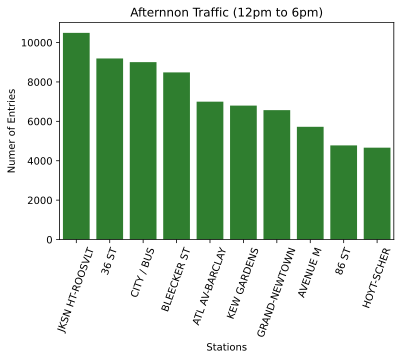

In [34]:
horly_stations = sns.barplot(x = afternoon['station'][:10], 
            y = afternoon['daily_entries'][:10], 
            data = afternoon,
            color = 'forestgreen'
           )

plt.xticks(rotation = 70)
plt.ylabel('Numer of Entries')
plt.xlabel('Stations')
plt.title('Afternnon Traffic (12pm to 6pm)')


Text(0.5, 1.0, 'Evening Traffic (6pm to midnight)')

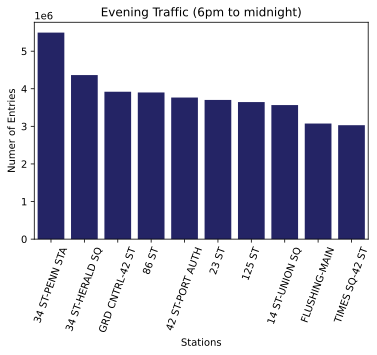

In [35]:
horly_stations = sns.barplot(x = evening['station'][:10], 
            y = evening['daily_entries'][:10], 
            data = evening,
            color = 'midnightblue'
           )

plt.xticks(rotation = 70)
plt.ylabel('Numer of Entries')
plt.xlabel('Stations')
plt.title('Evening Traffic (6pm to midnight)')


## Ridership Traffic

In [36]:
# let's first dig into ridership at the station level

station_total = turnstiles_daily.groupby(['station'])[['daily_entries']]\
                .sum().sort_values('daily_entries', ascending = False).reset_index()
station_total

,station,daily_entries
0,34 ST-PENN STA,5504268.0
1,34 ST-HERALD SQ,4365327.0
2,GRD CNTRL-42 ST,3924488.0
3,86 ST,3906492.0
4,42 ST-PORT AUTH,3766601.0
...,...,...
374,TOMPKINSVILLE,38195.0
375,BEACH 98 ST,23337.0
376,BROAD CHANNEL,15116.0
377,BEACH 105 ST,15094.0


[Text(0.5, 1.0, 'daily_entries')]

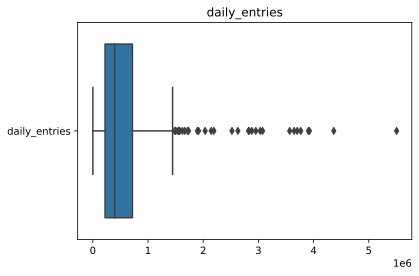

In [37]:
sns.boxplot(data = station_total, orient = 'h').set(title = 'daily_entries')

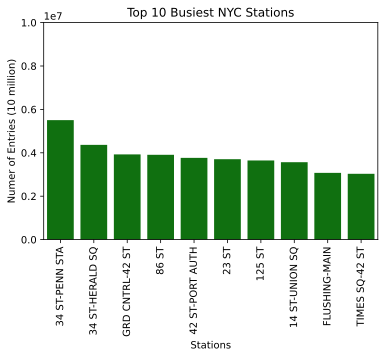

In [38]:
top_10_stations = sns.barplot(x = station_total['station'][:10], 
            y = station_total['daily_entries'][:10], 
            data = station_total,
            color = 'green'
           )

plt.xticks(rotation = 90)
plt.ylabel('Numer of Entries (10 million)')
plt.xlabel('Stations')
plt.title('Top 10 Busiest NYC Stations', )
plt.ylim(0,10000000)
plt.savefig('Top 10 Busiest Stations')

In [39]:
ridership_avg = turnstiles_daily.groupby(["date"])[['daily_entries']].mean().reset_index()
ridership_median = turnstiles_daily.groupby(["date"])[['daily_entries']].median().reset_index()
ridership_sum = turnstiles_daily.groupby(["date"])[['daily_entries']].sum().reset_index()

In [40]:
ridership_avg = turnstiles_daily.groupby(["date"])[['daily_entries']].mean().reset_index()
ridership_median = turnstiles_daily.groupby(["date"])[['daily_entries']].median().reset_index()
ridership_sum = turnstiles_daily.groupby(['date'])[['daily_entries']].sum().reset_index()

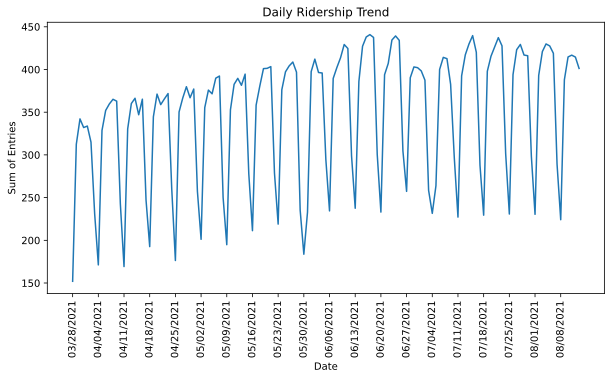

In [41]:
plt.figure(figsize = (10,5))

sns.lineplot(x = 'date', y = 'daily_entries', data = ridership_avg)
# sns.lineplot(x = 'date', y = 'daily_entries', data = ridership_median)
# sns.lineplot(x = 'date', y = 'daily_entries', data = ridership_sum)

plt.title('Daily Ridership Trend')
plt.xticks(ridership_avg['date'][::7],rotation = 90) # the dates are only shown every sunday
# plt.legend(['Mean','Median'],shadow = True, loc = 0)
plt.xlabel('Date')
plt.ylabel('Sum of Entries')
plt.savefig('Daily Traffic')

In [42]:
# How every day differs, e.g., weekday versus weekend?

turnstiles_daily['day_of_week'] = pd.to_datetime(turnstiles_daily['date']).dt.dayofweek
turnstiles_daily['week_of_year'] = pd.to_datetime(turnstiles_daily['date']).dt.week

<ipython-input-42-3591ae0a2589>:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  turnstiles_daily['week_of_year'] = pd.to_datetime(turnstiles_daily['date']).dt.week


In [43]:
week_trend = turnstiles_daily.groupby(['day_of_week'])[['daily_entries']].sum()

(0.0, 50000000.0)

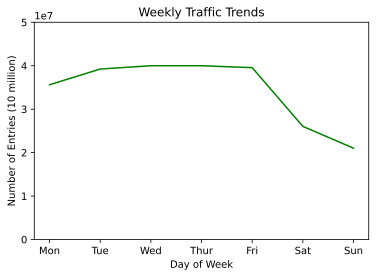

In [44]:
sns.lineplot(x = 'day_of_week', y = 'daily_entries', data = week_trend, color = 'green')
plt.xlabel ('Day of Week')
plt.ylabel ('Number of Entries (10 million)')
plt.title ('Weekly Traffic Trends')
plt.xticks(np.arange(7), ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'])
plt.ylim(0,50000000)

In [45]:
# we observed 
weekly_traffic = turnstiles_daily.groupby(['station','day_of_week'])[['daily_entries']]\
        .sum('daily_entries').sort_values(by = 'daily_entries', ascending = False).reset_index()
weekly_traffic = weekly_traffic[(weekly_traffic['station'] == '34 ST-PENN STA')|
                                (weekly_traffic['station'] == '34 ST-HERALD SQ')|
                                (weekly_traffic['station'] == 'GRD CNTRL-42 ST')|
                                (weekly_traffic['station'] == '86 ST')|
                                (weekly_traffic['station'] == '42 ST-PORT AUTH')
                               ]

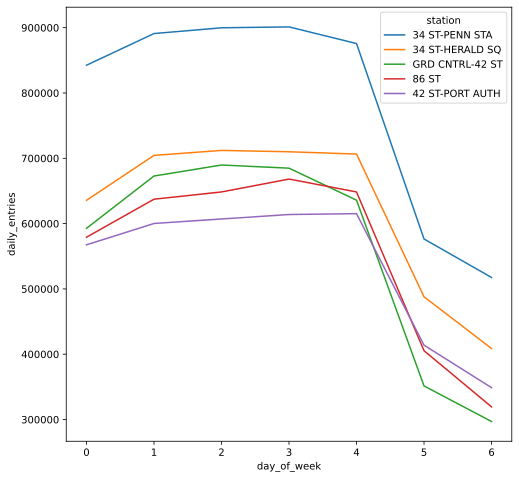

In [46]:
plt.figure(figsize = (8,8))
sns.lineplot(x = 'day_of_week', y = 'daily_entries', data = weekly_traffic, hue = 'station')
plt.savefig('Top 5 Busiest Stations Weekly Trend')

## Geo-spatial Data

In [47]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [48]:
pip install pyshp

Note: you may need to restart the kernel to use updated packages.


In [49]:
pip install stations_dict

ERROR: Could not find a version that satisfies the requirement stations_dict
ERROR: No matching distribution found for stations_dict
Note: you may need to restart the kernel to use updated packages.


In [50]:
import geopandas as gpd
from geopandas import GeoSeries 
from geopandas import GeoDataFrame
import shapefile
from shapely.geometry import Point
from shapely.geometry import shape


In [51]:
from station_names import station_names # importing a python file that includes a dictionary for station names.

ModuleNotFoundError: No module named 'station_names'

In [ ]:
top_100_stations = station_total.head(100)
top_100_stations['station'] = top_100_stations['station'].map(station_names)

In [ ]:
top_100_stations

In [ ]:
nyc_boro = gpd.read_file('/Users/hyewonjeong/Dropbox/My Mac (Heeyewon’s MacBook Pro)/Downloads/nybb_16b/nybb.shp')
nyc_boro.info()

In [ ]:
nyc_boro['BoroName'].unique()

In [ ]:
nyc_boro = nyc_boro[nyc_boro['BoroName'] != 'Staten Island'] # we are not looking at Staten Island 
nyc_boro.head()

In [ ]:
nyc_subway = gpd.read_file('/Users/hyewonjeong/Dropbox/My Mac (Heeyewon’s MacBook Pro)/Downloads\
/nyc_subway/DOITT_SUBWAY_STATION_01_13SEPT2010.shp')
nyc_subway.info()

In [ ]:
nyc_subway = nyc_subway.rename(columns = {'NAME':'station'}) # rename column name consistently
nyc_subway.drop(columns = ['URL','LINE'], inplace = True)

In [ ]:
fig, ax = plt.subplots(figsize = (9, 9))
nyc_boro.plot(ax = ax, cmap = 'Pastel2', column = 'BoroName', legend = True) 
nyc_subway.plot(ax = ax)

In [ ]:
subway_boro = gpd.sjoin(nyc_subway, nyc_boro, how="left", op='intersects')
subway_boro.info()

In [ ]:
subway_boro.drop(columns = ['index_right','Shape_Area', 'Shape_Leng', 'BoroCode'], inplace=True)
subway_boro.columns

In [ ]:
top_100_stations = top_100_stations.merge(subway_boro, on='station', how = 'inner')
top_100_stations.columns

In [ ]:
top_100_stations[top_100_stations.duplicated(subset = ['station', 'geometry'], keep='first')]

In [ ]:

top_100_stations.dropna(inplace=True) # Drop nulls
top_100_stations.drop_duplicates(subset=['station'], inplace=True) # Drop duplicates, keeping the first
top_100_stations.shape

In [ ]:
sns.pairplot(top_100_stations, hue = 'BoroName');

In [ ]:
sns.boxplot(x = 'daily_entries', y = 'BoroName', data = top_100_stations, orient = 'h').set(title = 'daily_entries')
plt.xlabel ('Sum of Entries')
plt.ylabel ('Boroughs')
plt.title ('Traffic per Borough')

In [ ]:
station_gs = GeoSeries(top_100_stations['geometry'])
marker_size = (top_100_stations['daily_entries'])/4000 # divided by 10 for reasonable marker size

# plot NYC map and total foot traffic by station 
fig, ax = plt.subplots(figsize = (9, 9))
nyc_boro.plot(ax = ax, cmap = 'Pastel2', column = 'BoroName', legend = True)
station_gs.plot(ax = ax, marker='.', color = 'red', 
                markersize = marker_size, alpha = 0.3)

#ax.set_axis_off()
ax.set_title("MTA Ridership Map in Boroughs")
plt.show()